#### Origem dos dados: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

#### Esses dados devem ser utilizados originalmente para prever doenças cardíacas, mas no caso desse exemplo quero mostrar o impacto de dados faltantes, algo que, em alguns casos como na área da medicina, deve ser avaliado minuciosamente.

In [346]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder



In [347]:
Data = pd.read_csv("heart.csv")

In [348]:
Data = Data[Data.Cholesterol != 0]


In [349]:
Data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Imagine que 40% das medidas de colesterol dos pacientes estão faltando de forma aleatória

In [350]:
for column in Data.columns:
  if Data[column].dtype == object:
    le = LabelEncoder()
    Data[column] = le.fit_transform(Data[column])


In [351]:
num_rows_to_replace = int(len(Data) * 0.4)

rows_to_replace = np.random.choice(Data.index, size=num_rows_to_replace, replace=False)
Dados_Faltantes = Data.copy()
Dados_Faltantes.loc[rows_to_replace, 'Cholesterol'] = np.nan


In [352]:
Dados_Faltantes.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160,NaN,0,1,156,0,1.0,1,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138,NaN,0,1,108,1,1.5,1,1
4,54,1,2,150,NaN,0,1,122,0,0.0,2,0
5,39,1,2,120,NaN,0,1,170,0,0.0,2,0
6,45,0,1,130,NaN,0,1,170,0,0.0,2,0
7,54,1,1,110,208.0,0,1,142,0,0.0,2,0
8,37,1,0,140,207.0,0,1,130,1,1.5,1,1
9,48,0,1,120,284.0,0,1,120,0,0.0,2,0


# Isso irá impactar a predição de nosso modelo?

#### Drop das linhas

In [353]:
Data_Faltante = Dados_Faltantes.dropna()

X = Data_Faltante.drop('HeartDisease', axis=1)
y = Data_Faltante['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fscore = f1_score(y_test, y_pred)

print(f"Acurácia do modelo: {accuracy}")
print(f"Recall do modelo: {recall}")
print(f"F-score do modelo: {fscore}")


Acurácia do modelo: 0.8888888888888888
Recall do modelo: 0.925
F-score do modelo: 0.8809523809523809


#### Sem Drop das linhas

In [354]:
X = Data.drop('HeartDisease', axis=1)
y = Data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fscore = f1_score(y_test, y_pred)

print(f"Acurácia do modelo: {accuracy}")
print(f"Recall do modelo: {recall}")
print(f"F-score do modelo: {fscore}")


Acurácia do modelo: 0.8866666666666667
Recall do modelo: 0.8481012658227848
F-score do modelo: 0.8874172185430463


#### Conclusão: dados faltantes nem sempre podem impactar tanto em alguns casos (como neste modelo).
#### Isso não diz, no entanto, que esses dados são completamente inúteis, lembre-se que estamos prevendo algo muito específico (Doenças Cardíacas), e se quisermos usar esses dados dos pacientes para outro propósito? Será que o colesterol terá o mesmo impacto nesse quesito? Ou ele será uma medida mais importante?

#### Por isso, dados não preenchidos devem ser avaliados, que tal fazermos uma troca simples, pela média do colesterol? Vamos ver como o modelo reage à isso.

In [355]:
Data_Media_Colesterol = Dados_Faltantes.copy()

media_colesterol = Data_Media_Colesterol['Cholesterol'].mean()

Data_Media_Colesterol['Cholesterol'].fillna(media_colesterol, inplace=True)

X = Data_Media_Colesterol.drop('HeartDisease', axis=1)
y = Data_Media_Colesterol['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fscore = f1_score(y_test, y_pred)

print(f"Acurácia do modelo: {accuracy}")
print(f"Recall do modelo: {recall}")
print(f"F-score do modelo: {fscore}")


Acurácia do modelo: 0.8866666666666667
Recall do modelo: 0.8354430379746836
F-score do modelo: 0.8859060402684564


#### Note como a média não segue o fluxo normal do colesterol de acordo com a maior frequência cardíaca atingida. Ou seja, o colesterol médio não serve tão bem para indicar o colesterol faltante, pois varia de pessoa à pessoa (a maior frequência cardíaca atingida é só um dos indicativos disso)

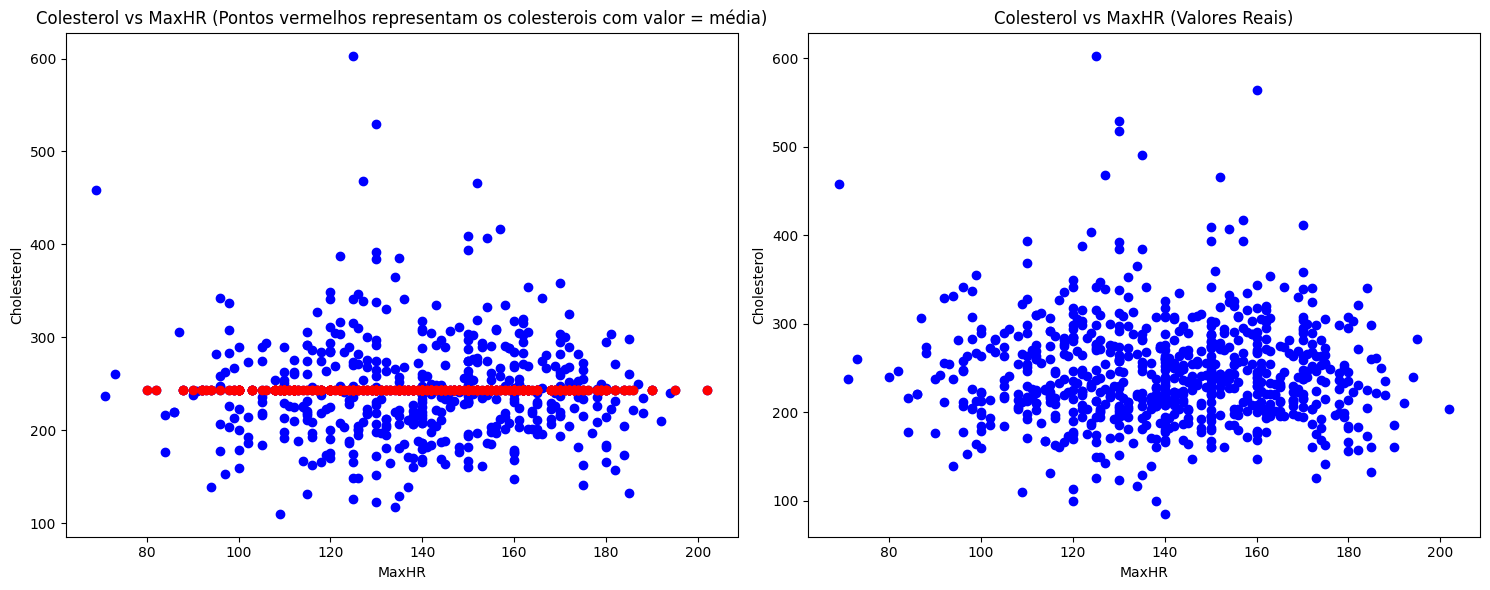

In [356]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(Data_Media_Colesterol['MaxHR'], Data_Media_Colesterol['Cholesterol'], color='blue')
plt.scatter(Data_Media_Colesterol[Data_Media_Colesterol['Cholesterol'] == media_colesterol]['MaxHR'],
            Data_Media_Colesterol[Data_Media_Colesterol['Cholesterol'] == media_colesterol]['Cholesterol'],
            color='red')
plt.xlabel('MaxHR')
plt.ylabel('Cholesterol')
plt.title('Colesterol vs MaxHR (Pontos vermelhos representam os colesterois com valor = média)')

plt.subplot(1, 2, 2)
plt.scatter(Data['MaxHR'], Data['Cholesterol'], color='blue')
plt.scatter(Data[Data['Cholesterol'] == media_colesterol]['MaxHR'],
            Data[Data['Cholesterol'] == media_colesterol]['Cholesterol'],
            color='red')
plt.xlabel('MaxHR')
plt.ylabel('Cholesterol')
plt.title('Colesterol vs MaxHR (Valores Reais)')

plt.tight_layout()
plt.show()


#### Usando K-Nearest Neighbors para prever o colesterol faltante

#### Faz sentido, o vizinho de alguém (um suposto ponto com dados similares) tenderá a ter um colesterol similar, pois os outros dados são similares. É claro que isso é apenas uma suposição, afinal de contas com um conjunto de dados tão pequenos é impossível encaixar uma pessoa de forma definitiva em um certo grupo.

In [357]:
X_without_drop = Dados_Faltantes.copy()
X = Dados_Faltantes.drop('Cholesterol', axis=1)

y = Dados_Faltantes['Cholesterol']

y_real = Data['Cholesterol']
y_real = y_real[X_without_drop['Cholesterol'].isnull()]

X_test = X[X_without_drop['Cholesterol'].isnull()]
y_test = y[X_without_drop['Cholesterol'].isnull()]

X_train = X[X_without_drop['Cholesterol'].notnull()]
y_train = y[X_without_drop['Cholesterol'].notnull()]



In [358]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [359]:
melhor_rmse = float('inf')
melhor_vizinhos = 1

for vizinhos in range(1, 11):
    imputer = KNNImputer(n_neighbors=vizinhos)

    modelo_knn = KNeighborsRegressor(n_neighbors=vizinhos)
    modelo_knn.fit(X_train, y_train)

    y_pred = modelo_knn.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_real, y_pred))

    if rmse < melhor_rmse:
        melhor_rmse = rmse
        melhor_vizinhos = vizinhos

print(f'Melhor RMSE: {melhor_rmse} com {melhor_vizinhos} vizinhos.')

imputer = KNNImputer(n_neighbors=melhor_vizinhos)


modelo_knn = KNeighborsRegressor(n_neighbors=melhor_vizinhos)
modelo_knn.fit(X_train, y_train)

y_pred = modelo_knn.predict(X_test)
MAE = mean_absolute_error(y_real, y_pred)

print(f'Mean Absolute Error: {MAE}')


Melhor RMSE: 60.13447430550965 com 10 vizinhos.
Mean Absolute Error: 45.876174496644296


In [360]:
predicted_cholesterol = pd.Series(y_pred, index=X_test.index)

Dados_Faltantes['Cholesterol'] = Dados_Faltantes['Cholesterol'].fillna(predicted_cholesterol)


In [361]:
Dados_Faltantes.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


#### Olhe só como agora o colesterol tende a seguir um padrão mais "correto"

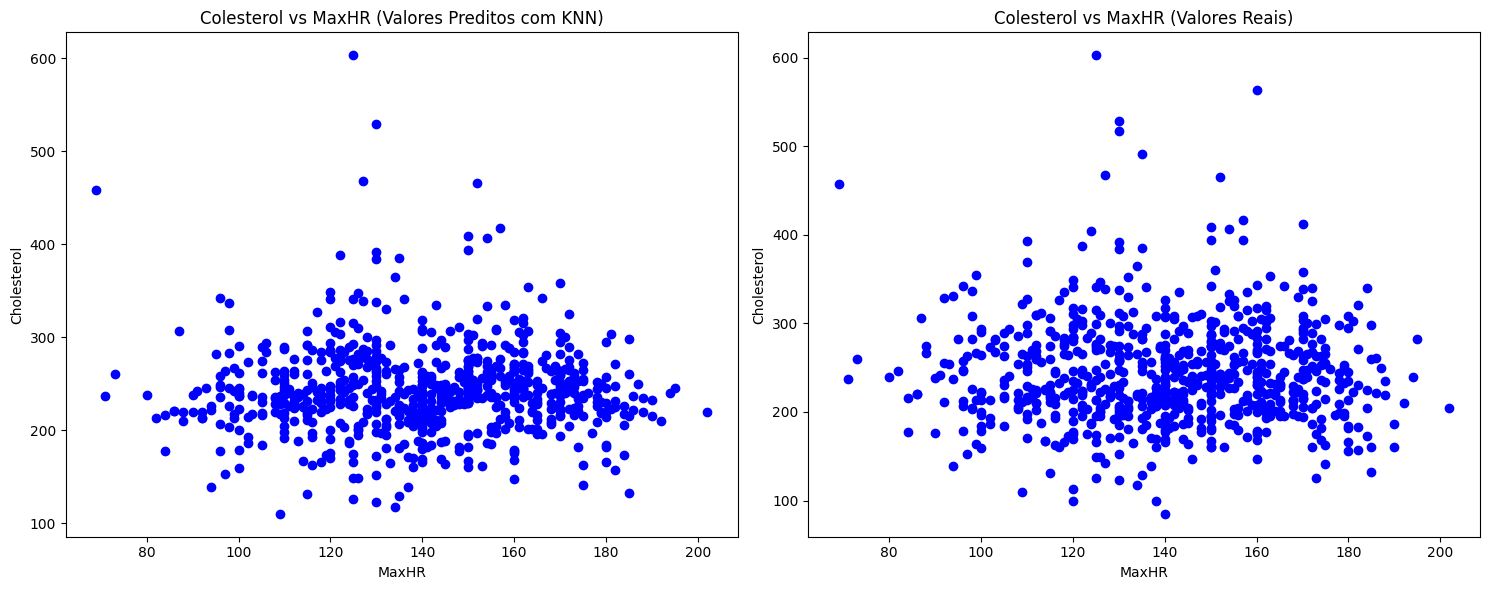

In [362]:

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(Dados_Faltantes['MaxHR'], Dados_Faltantes['Cholesterol'], color='blue')
plt.xlabel('MaxHR')
plt.ylabel('Cholesterol')
plt.title('Colesterol vs MaxHR (Valores Preditos com KNN)')

plt.subplot(1, 2, 2)
plt.scatter(Data['MaxHR'], Data['Cholesterol'], color='blue')
plt.xlabel('MaxHR')
plt.ylabel('Cholesterol')
plt.title('Colesterol vs MaxHR (Valores Reais)')

plt.tight_layout()
plt.show()
